In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [198]:
%matplotlib inline

In [199]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()
df.shape

(9879, 40)

In [200]:
df['blueWins'].value_counts()
df.columns.values

array(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff',
       'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin',
       'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills',
       'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff',
       'redCSPerMin', 'redGoldPerMin'], dtype=object)

Cleaning the data

In [201]:
toDrop = ['gameId', 'redDeaths', 'redKills', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redFirstBlood', 'redTotalExperience', 'blueGoldPerMin', 'redTotalGold', 'blueAvgLevel', 'redAvgLevel']
df_clean = df.drop(toDrop, axis=1)
df_clean.shape
df_clean.info()
cm = df_clean.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueTotalExperience           9879 non-null   int64  
 13  blu

Creating a correlation matrix to visualize the data

<Axes: >

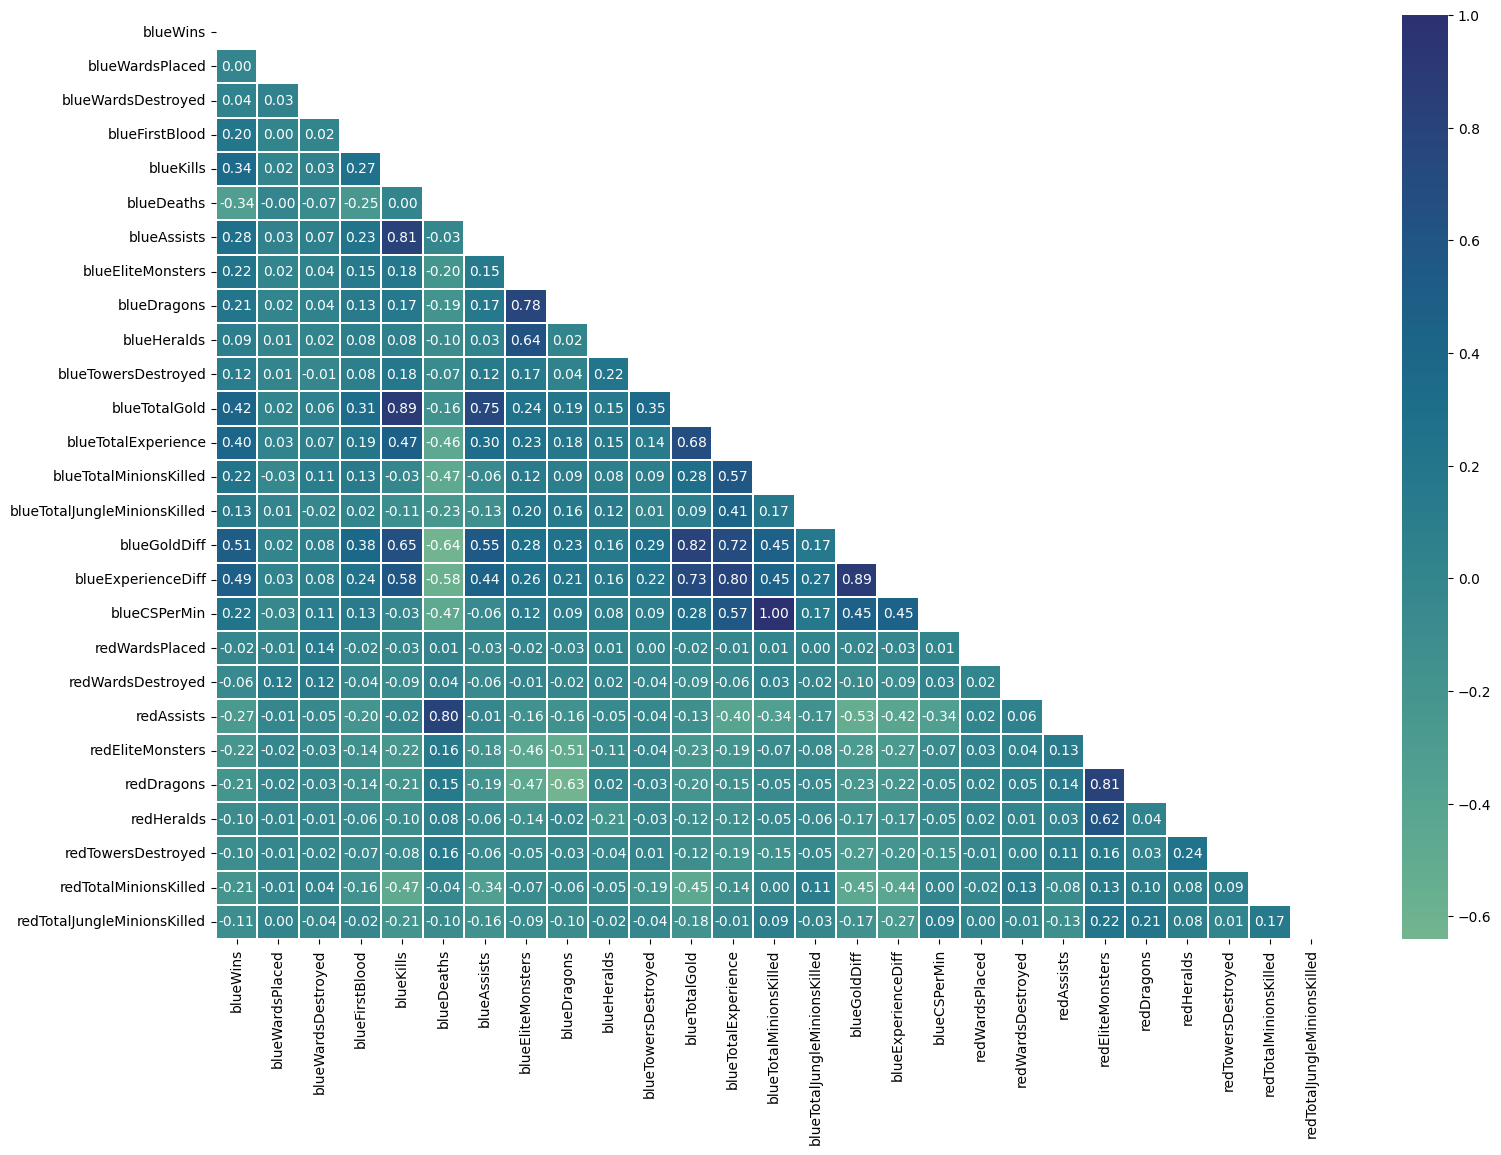

In [202]:
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18, 12))
sns.heatmap(cm, center=0, fmt='.2f', annot=True, linewidth=.3, mask=mask, cmap="crest")

Removing features that have low correlation with the label

In [203]:
col = ['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueTotalGold',
 'blueTotalExperience']
df_clean = df_clean[col]

df_clean.shape

(9879, 8)

In [204]:
scaler = MinMaxScaler()
x = df_clean
feature = df['blueWins']

scaler.fit(x)
x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, feature, test_size=0.2, random_state=42)

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)

# get accuracy score
y_pred = lm.predict(x_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.7302631578947368


SVM with a linear kernel

In [206]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)


SVC(kernel='linear')

In [207]:
y_predict = sv.predict(x_test)

In [208]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.73      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



In [209]:
print(accuracy_score(y_predict, y_test))

0.729251012145749
